# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# Exercise 1 - Solutions

## Objective

Wine fraud relates to the commercial aspects of wine. 
The most prevalent type of fraud is when wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).
Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.


A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. 
The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. 
The distribution company has hired you to attempt to create a machine learning model that can help detect low quality, i.e. fraud, wine samples. 
They want to know if it is even possible to detect such a difference.

The overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. 

## About the Dataset

This dataset contains the information related to red wine and various factors affecting its quality. 
It is prepossessed and downloaded from the UCI Machine Learning Repository. 

### Source: 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

https://archive.ics.uci.edu/ml/datasets/wine+quality. 


## Data Attributes Information
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality ('good' and 'bad' based on score >5 and <5)

<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/Ch%C3%A2teau_P%C3%A9trus.jpg" alt="fraud wine" width=500 >

*Expensive and highly collectable wines such as the French Bordeaux wine from Château Pétrus are often the target of wine fraud.*

*Source:* https://en.wikipedia.org/wiki/Wine_fraud

# Task 1: Run the cells below to import the libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 2: Load the dataset

- Name: `wine.csv`
- Folder: `datasets`

In [156]:
# MY CODE HERE
df = pd.read_csv(r"C:\Users\batvi\essential-machine-learning-for-physicists\datasets\wine.csv")

# Task 3: Show the size, show the first rows and describe the dataset (optional)

In [3]:
# MY CODE HERE
df.shape

(6497, 13)

In [53]:
# ?

In [4]:
# MY CODE HERE
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [11]:
# ?

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
# MY CODE HERE
df.describe().drop('count')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [89]:
# ?

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


# Task 4: Check for missing values

In [6]:
# MY CODE HERE
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

In [10]:
# ?

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

# Task 5: What are the unique variables in the target column we are trying to predict?

In [7]:
# MY CODE HERE
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

In [12]:
# ?

array(['Legit', 'Fraud'], dtype=object)

# Task 6: Make a pie plot for the wine quality

<Axes: title={'center': 'Percentage of fraud and legit quality wine'}, ylabel='count'>

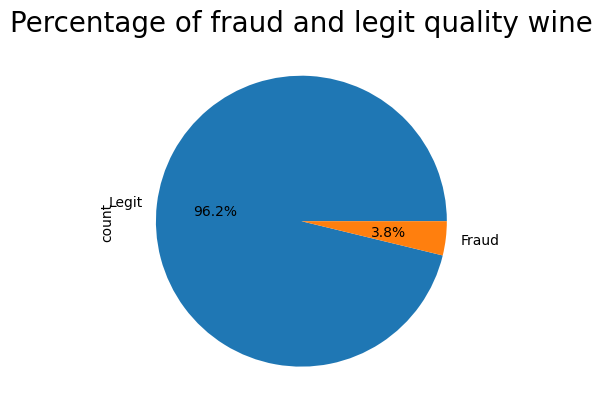

In [73]:
# MY CODE HERE
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, bottom=0.5, right=1, top=0.9, wspace=0.5, hspace=0.8)
plt.subplot(141)
plt.title('Percentage of fraud and legit quality wine',fontsize = 20)
df['quality'].value_counts().plot.pie(autopct="%1.1f%%")

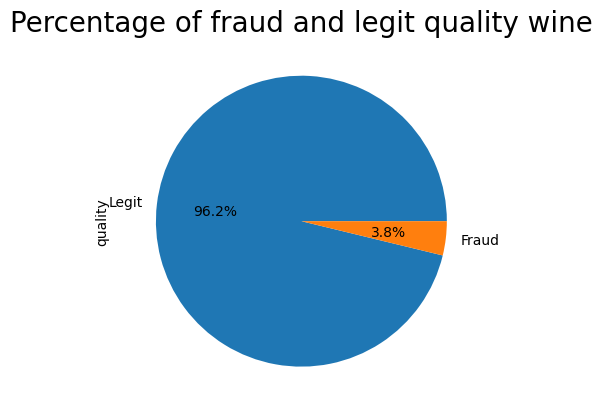

In [19]:
#?

# Task 7: Show the target value counts in a bar plot (optional)

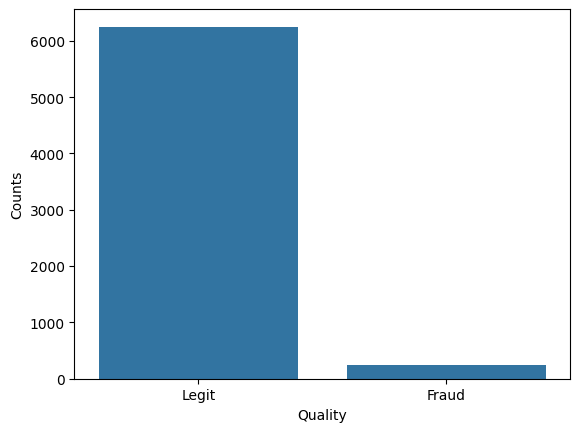

In [9]:
# MY CODE HERE
sns.countplot(x='quality', data=df)
plt.xlabel("Quality")
plt.ylabel("Counts");

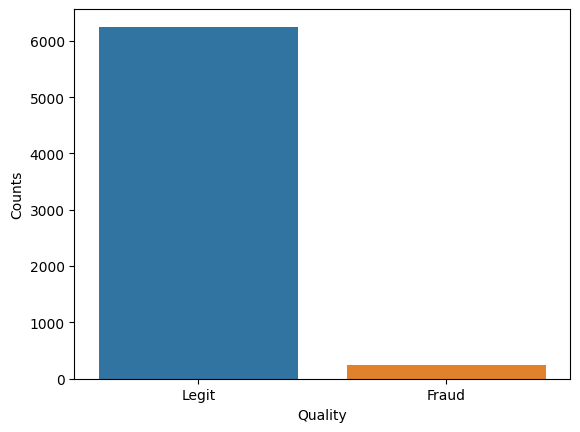

In [25]:
# ?

# Task 8: Check whether here is a difference between red and white wine when it comes to fraud (optional)

Create a countplot that has the wine type on the x axis with the hue separating columns by Fraud vs Legit.

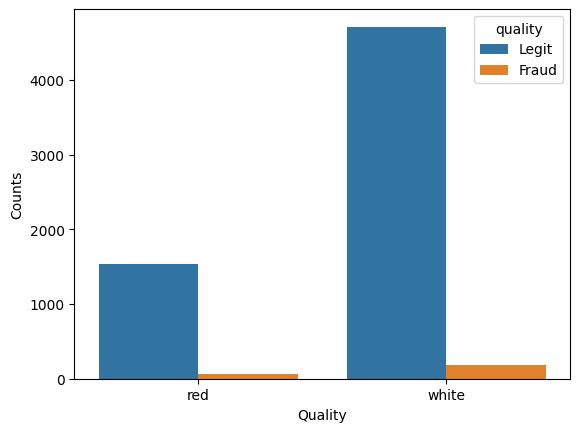

In [10]:
# MY CODE HERE
sns.countplot(x='type', data=df, hue = 'quality')
plt.xlabel("Quality")
plt.ylabel("Counts");

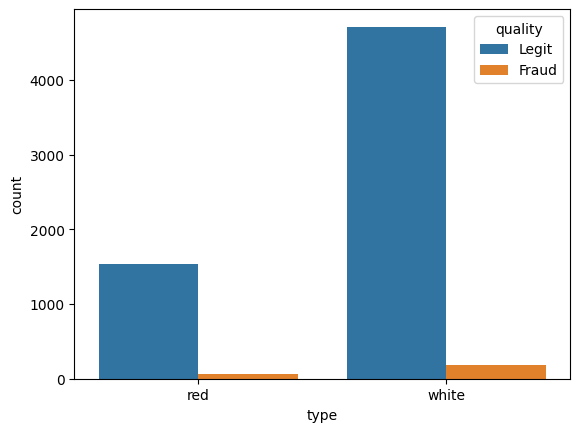

In [29]:
# ?

# Task 9: Fraud per wine type (optional)

What percentage of red wines are Fraud? 
What percentage of white wines are fraud?

In [81]:
help(pd.Series.value_counts)

Help on function value_counts in module pandas.core.base:

value_counts(self, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series'
    Return a Series containing counts of unique values.

    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.

    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies when True. Preserve the order of the data when False.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, default True
        Don't include counts of NaN.

In [74]:
# MY CODE HERE
df.groupby('type')['quality'].value_counts(normalize = True)*100

type   quality
red    Legit      96.060038
       Fraud       3.939962
white  Legit      96.263781
       Fraud       3.736219
Name: proportion, dtype: float64

In [33]:
# 

type   quality
red    Legit      96.060038
       Fraud       3.939962
white  Legit      96.263781
       Fraud       3.736219
Name: quality, dtype: float64

# Task 10: Target encoding

1. Perfom label encoding of the target. 
2. Call the new column "Fraud". 
3. Show its unique values.

In [157]:
# MY CODE HERE
df['Fraud']= df['quality'].map({'Legit':0,'Fraud':1})

In [152]:
df['Fraud'].unique()

array([0, 1])

In [39]:
# ?

In [40]:
# ?

array([0, 1])

# Task 11: Calculate and sort the correlation between the various features and the target column.

In [117]:
# MY CODE HERE
corr = df.corr(numeric_only = True).drop('Fraud')
corr['Fraud'].sort_values(ascending = False)

volatile acidity        0.151228
chlorides               0.034499
fixed acidity           0.021794
pH                      0.020107
density                 0.016351
sulphates              -0.034046
total sulfur dioxide   -0.035252
residual sugar         -0.048756
alcohol                -0.051141
citric acid            -0.061789
free sulfur dioxide    -0.085204
Name: Fraud, dtype: float64

In [49]:
# ?

volatile acidity        0.151228
chlorides               0.034499
fixed acidity           0.021794
pH                      0.020107
density                 0.016351
sulphates              -0.034046
total sulfur dioxide   -0.035252
residual sugar         -0.048756
alcohol                -0.051141
citric acid            -0.061789
free sulfur dioxide    -0.085204
Name: Fraud, dtype: float64

In [109]:
corr.shape

(11,)

# Task 12: Create a bar plot of the correlation values to fraudlent wine

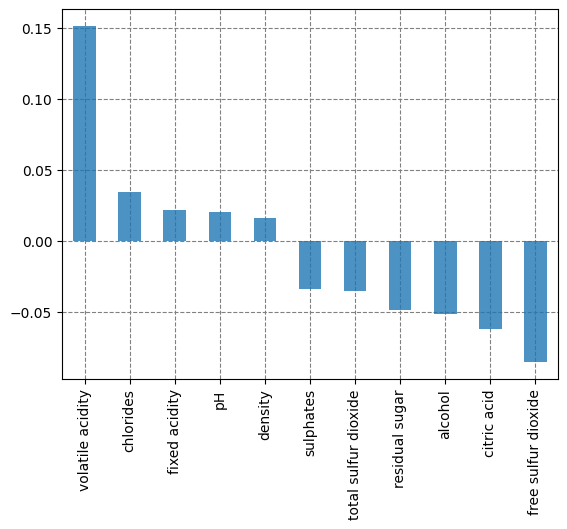

In [110]:
# MY CODE HERE
fig = plt.figure()    
ax = fig.add_subplot(1,1,1)
corr.plot(kind='bar',alpha=0.8)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed');

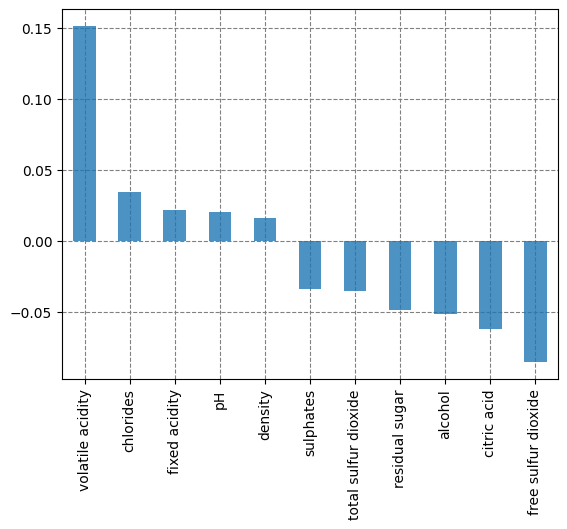

In [57]:
# ?

# Task 13: Create a correlation matrix.

In [119]:
# MY CODE HERE
corr = df.corr(numeric_only = True)
mask = np.triu(corr)
corr.shape

(12, 12)

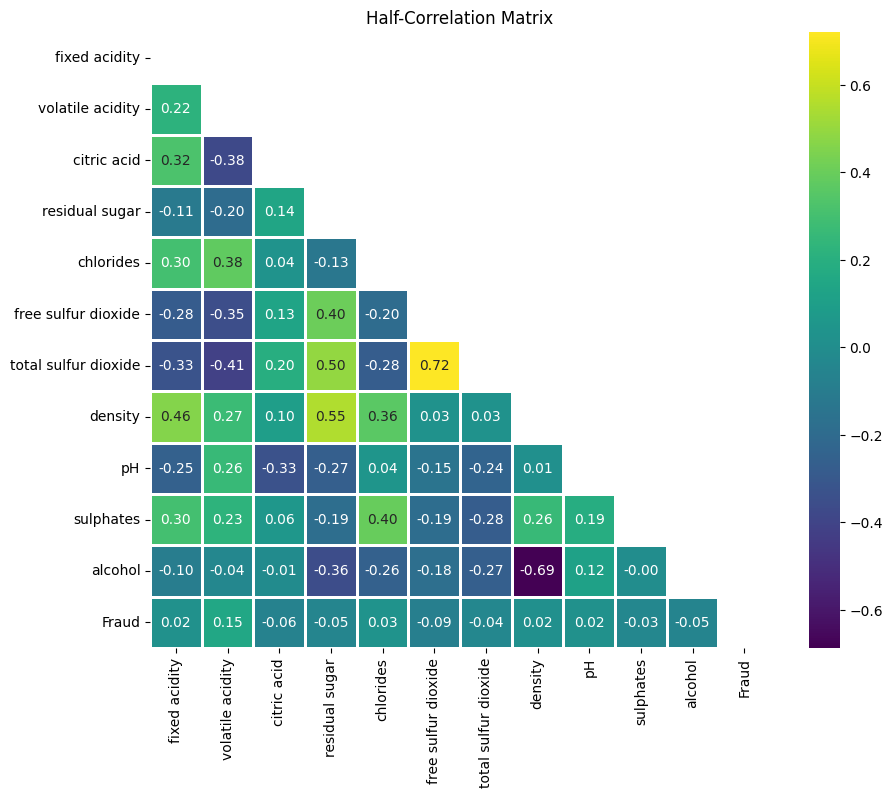

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, linewidth = 1, cmap="viridis", fmt=".2f")
plt.title("Half-Correlation Matrix")
plt.show()

In [244]:
# ?

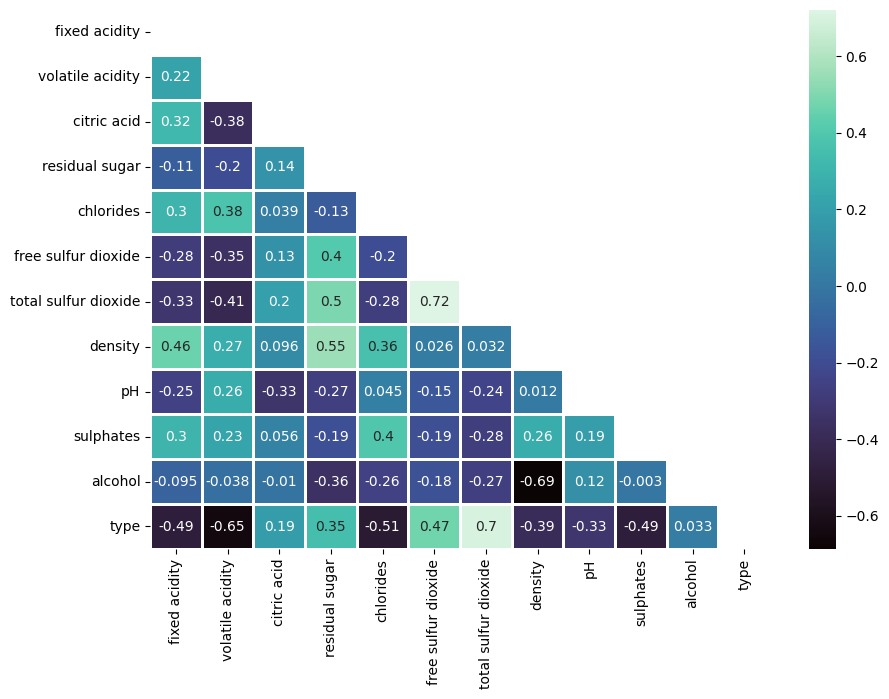

In [245]:
# ?

In [248]:
# ? (alternative)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.487218


# Task 14: Create a clustermap with seaborn to explore the relationships between variables

Seaborn's clustermap is a tool for making simple hierarchically-clustered heatmaps. Hierarchical clustering arranges items in a hierarchy with a treelike structure based on the distance or similarity between them. 
The graphical representation of the resulting hierarchy os a tree-structured graph called a dendrogram. Use `clustermap` to plot the correlation matrix dataset as a hierarchically-clustered heatmap.

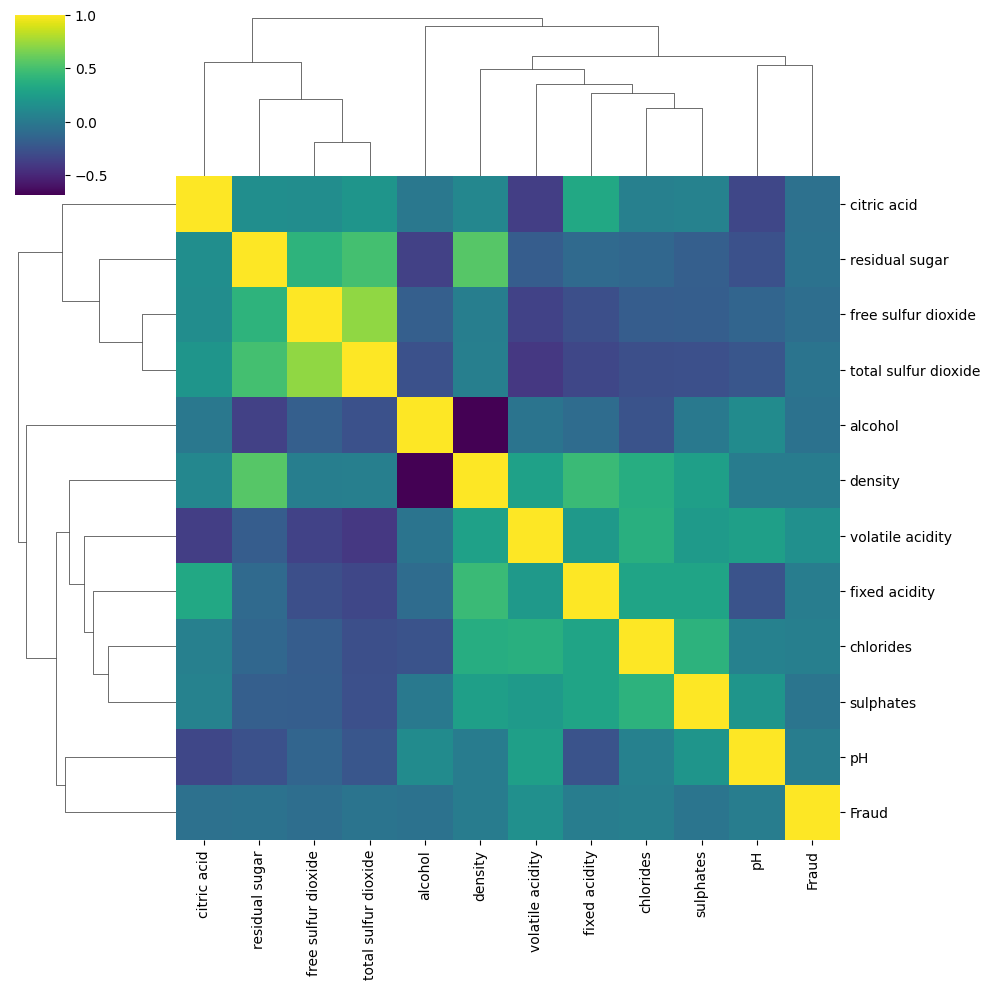

In [122]:
# MY CODE HERE
sns.clustermap(corr, cmap = "viridis")

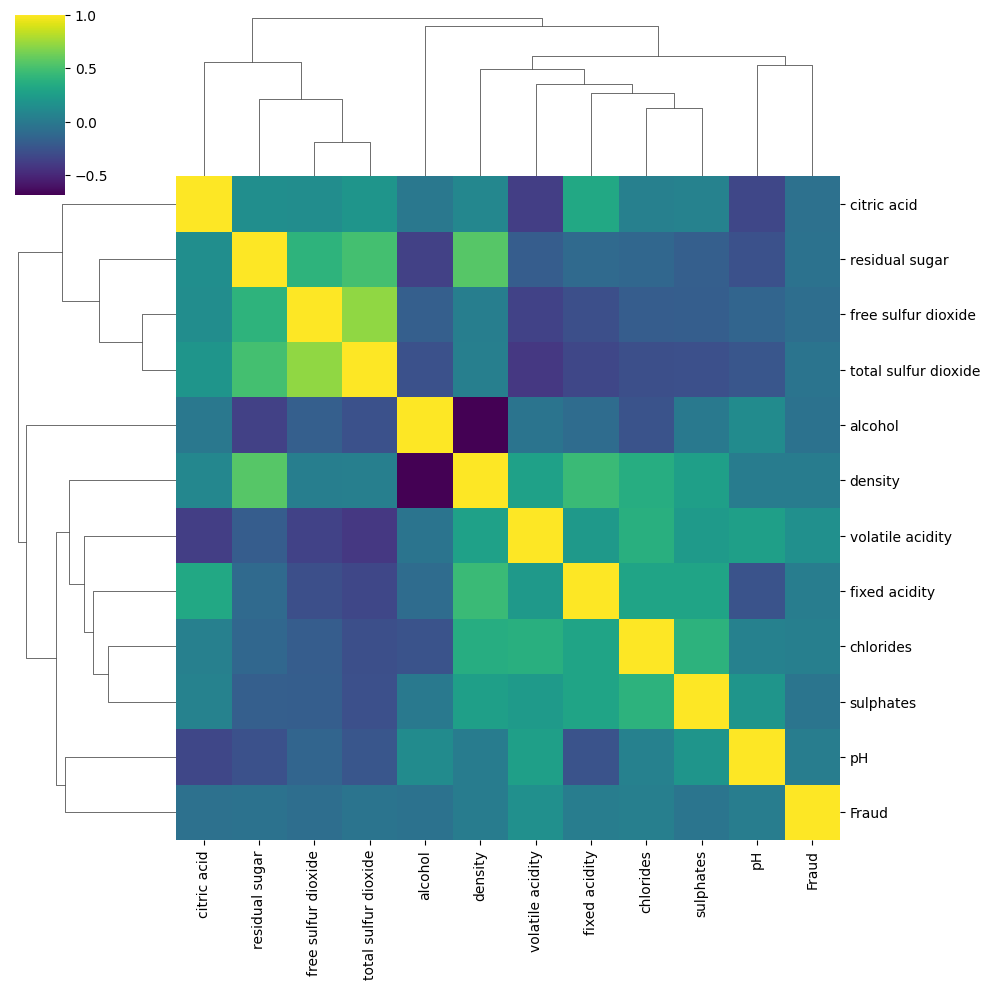

In [67]:
#

# Task 15: Plot the feature distributions

Try to show the inclusive distribution of each feature as well as for "fraud" and "legit" wines.

In [131]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


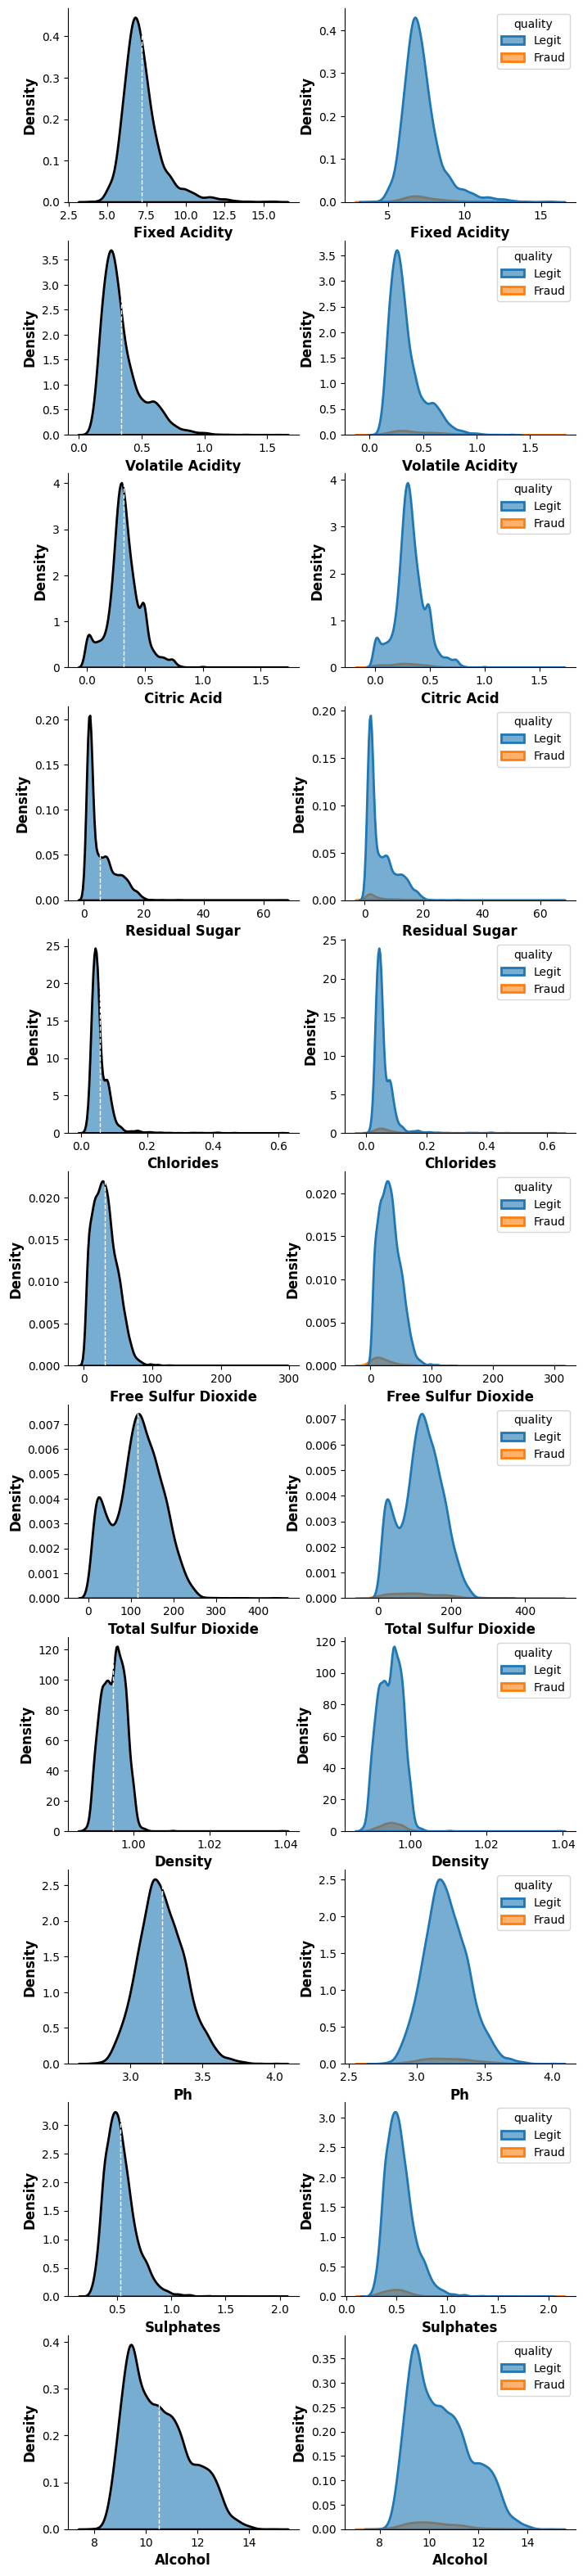

In [265]:
# MY CODE HERE
plotIndex = 1;
plt.figure(figsize=(8, 40));

for i in range(1, len(df.columns)-1):
    
    plt.subplot(11, 2, plotIndex)
    sns.kdeplot(data=df, 
                x=df.columns[i-1], 
                fill=True,
                linewidth=2, 
                alpha=0.6,
                edgecolor='k')
    plt.axvline(df[df.columns[i-1]].mean(), color='white', linestyle='--', linewidth=1)
    plt.xlabel(xlabel=df.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    plt.subplot(11, 2, plotIndex+1)
    sns.kdeplot(data=df, 
                x=df.columns[i-1], 
                fill=True,
                hue='quality', 
                linewidth=2, 
                alpha=0.6)
    plt.xlabel(xlabel=df.columns[i-1].title(), fontsize=12, weight='bold')
    plt.ylabel(ylabel='Density', fontsize=12, weight='bold')
    sns.despine()

    
    plotIndex += 2;

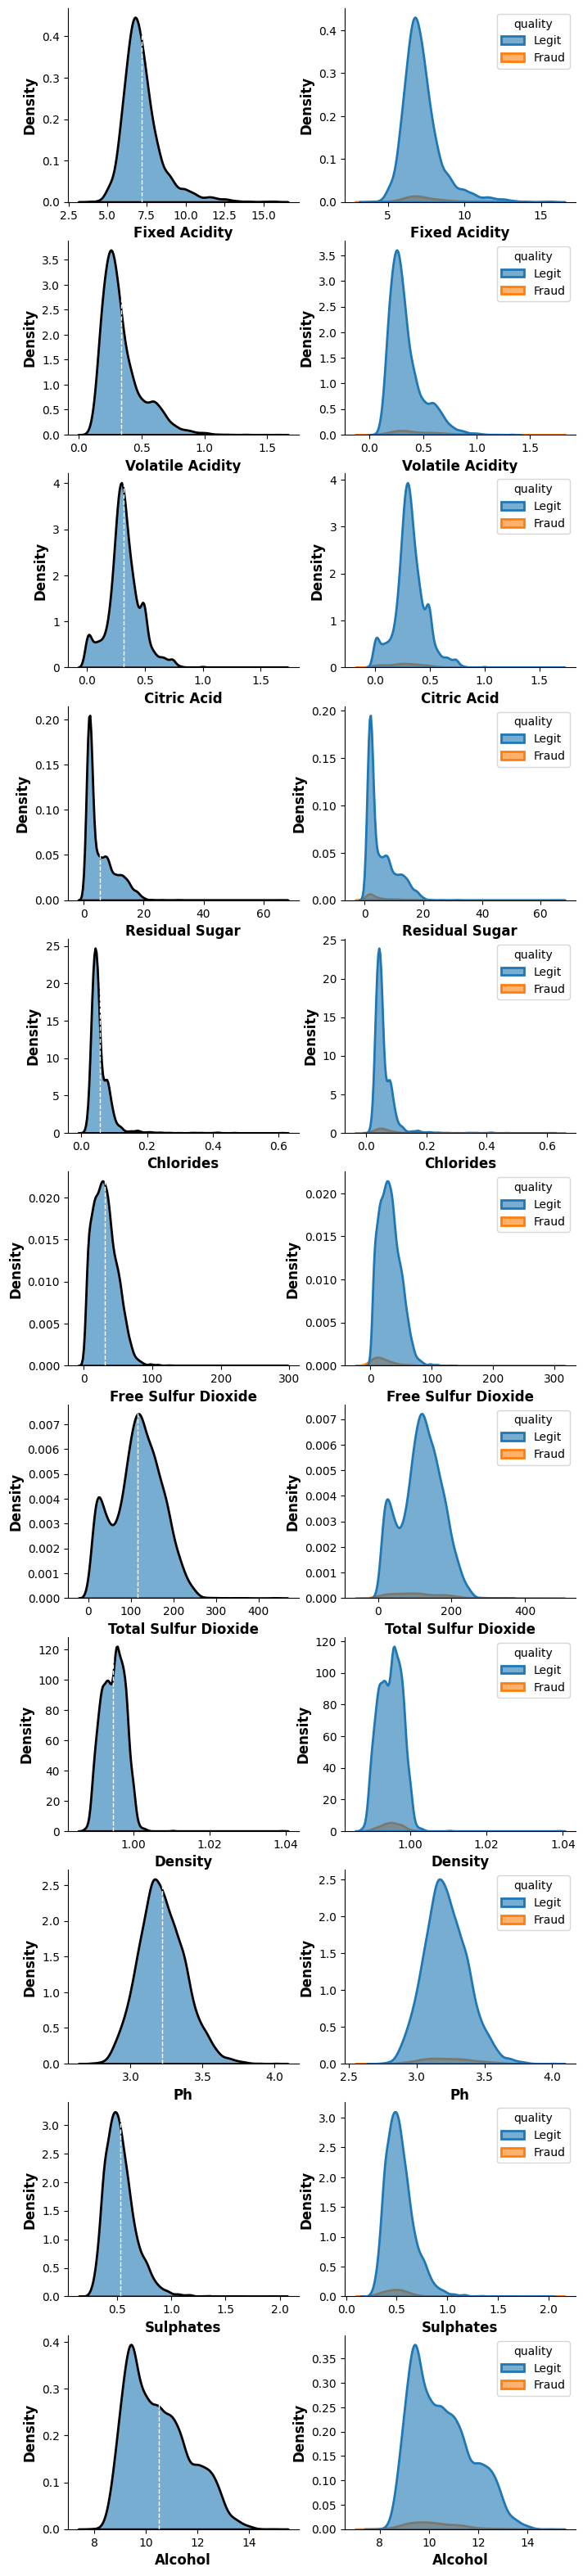

In [125]:
# ?

# Task 16: Categorical columns

1. Convert the categorical column "type" from a string or "red" or "white" to dummy variables.
2. Drop now the Fraud column.

In [158]:
# MY CODE HERE
df['type'] = pd.get_dummies(df['type'], drop_first=True)
df = df.drop('Fraud', axis = 1)

In [159]:
df['type'] = df['type'].astype(int)

In [68]:
# ?

# Task 17: Separate out the data into X features and y target label

In [160]:
# MY CODE HERE
X = df.drop('quality', axis = 1)
y = df['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [71]:
# ?

In [72]:
# ? (display X)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


# Task 18: Make sure there are no categoricals in the features set

In [164]:
# MY CODE HERE
X.select_dtypes(include=['category']).size

0

In [78]:
# ? (number of categorical features)

0

# Task 19: Perform a Train & Test split on the data

- Split with a 10% test size. 
- Set a random state of 1234.
- show the result shapes of the train and test feature sets.

In [231]:
# MY CODE HERE
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.1, random_state = 1234)
X_train.shape

(5847, 12)

In [233]:
X_test.shape

(650, 12)

In [79]:
# ?

In [80]:
# ?

In [81]:
# ? (train shape)

(5847, 12)

In [82]:
# ? (test hsape)

(650, 12)

# Task 20: Apply standardization on the train and test feature data

In [234]:
# MY CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# ?

In [84]:
# ?

In [85]:
# ?

# Task 21: Create an instance of a Support Vector Machine classifier. 

In the data exploration sections we observed that our datset is imbalanced in terms of the target label.
In an attempt to help the model alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call.
Check out the documentation for `SVC` and look up what the argument parameter is.

Finally, import from `sklearn.svm` and create an `SVC` model. 

In [179]:
# MY CODE HERE
from sklearn.svm import SVC

In [235]:
svc = SVC(class_weight='balanced')

In [127]:
# ?

In [128]:
# ?

# Task 22: Use a GridSearchCV to find the best model setup

1. Run a grid search for the best C and $\gamma$ parameters. Use 5 folds. Set the kernel function to `rbf`.
2. Show the best hyperparameters.
3. Show the averaged mean cv score on the test sample.

Hint: enable multiprocessing in your Grid CV search.

Optional: add in your grid search `'kernel':["rbf", "poly", "sigmoid"]`

In [242]:
# MY CODE HERE
from sklearn.model_selection import GridSearchCV
import os

In [274]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 0.9, 1], 
              'gamma':['scale','auto'],
              #'kernel':["rbf", "poly", "sigmoid"]
             }

In [275]:
ncores = os.cpu_count()-1
ncores

15

In [276]:
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           cv=5, scoring='accuracy', 
                           verbose=0, n_jobs=ncores)

In [277]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=15,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.9, 1],
                         'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [278]:
best_params = grid_search.best_params_
print("Best hyperparameters found by GridSearchCV:", best_params)

Best hyperparameters found by GridSearchCV: {'C': 1, 'gamma': 'auto'}


In [279]:
mean_cv_score = grid_search.best_score_
print(f"Averaged mean CV score on the test sample: {mean_cv_score:.4f}")

Averaged mean CV score on the test sample: 0.8476


In [168]:
# ? (imports)

In [190]:
# ? (grid)

In [191]:
# ? (find cores)

In [192]:
# ? (show number of cores)

7

In [193]:
# ? (grid search cv instance) 

In [194]:
# ? (fit)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=7,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.9, 1],
                         'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [195]:
# ? (best params)

{'C': 1, 'gamma': 'auto'}

In [196]:
# ? (mean test score, do you achieve a better one?)

0.8055703245523604

# Task 23: Create an instance of the best model and fit it on the training data

In [280]:
# MY CODE HERE
best_model = SVC(class_weight='balanced', **best_params)

In [281]:
best_model.fit(X_train_scaled, y_train)

SVC(C=1, class_weight='balanced', gamma='auto')

In [197]:
# ? (model)

In [198]:
# ? (fit)

SVC(C=1, class_weight='balanced', gamma='auto')

# Task 24: Display the confusion matrix and classification report for your model

In [282]:
# MY CODE HERE
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [283]:
y_test_pred = best_model.predict(X_test_scaled)

In [284]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 12,  11],
       [100, 527]])

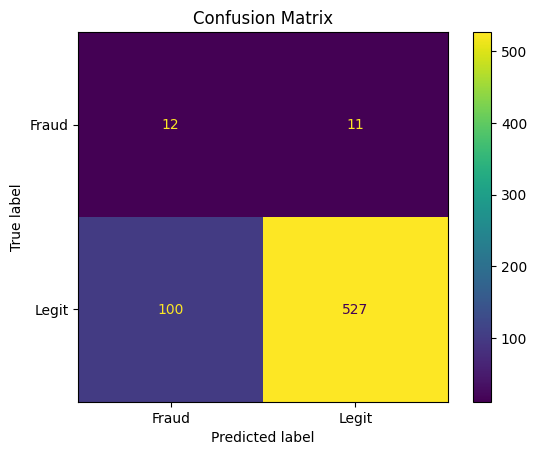

In [285]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [286]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

       Fraud       0.11      0.52      0.18        23
       Legit       0.98      0.84      0.90       627

    accuracy                           0.83       650
   macro avg       0.54      0.68      0.54       650
weighted avg       0.95      0.83      0.88       650



In [199]:
# ? (imports

In [200]:
# ? (test predictions)

In [201]:
# ? (confusion matrix)

array([[ 12,  11],
       [100, 527]])

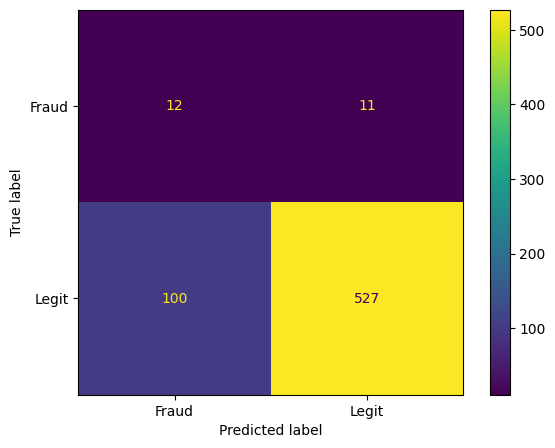

In [202]:
# ?

In [ ]:
# MY CODE HERE

In [203]:
# ? (imports)

In [204]:
# ? (clf report)

              precision    recall  f1-score   support

       Fraud       0.11      0.52      0.18        23
       Legit       0.98      0.84      0.90       627

    accuracy                           0.83       650
   macro avg       0.54      0.68      0.54       650
weighted avg       0.95      0.83      0.88       650



# Task 25: Create a ROC curve

In [258]:
# MY CODE HERE
from sklearn.metrics import RocCurveDisplay

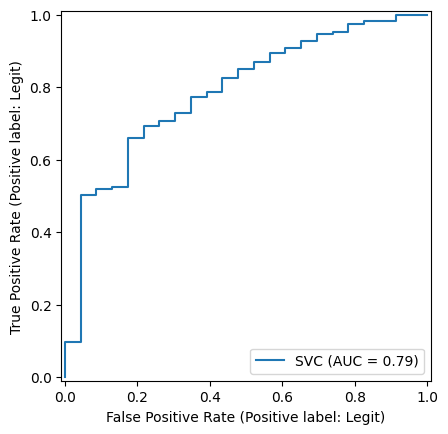

In [287]:
RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test);

In [267]:
# ? (imports)

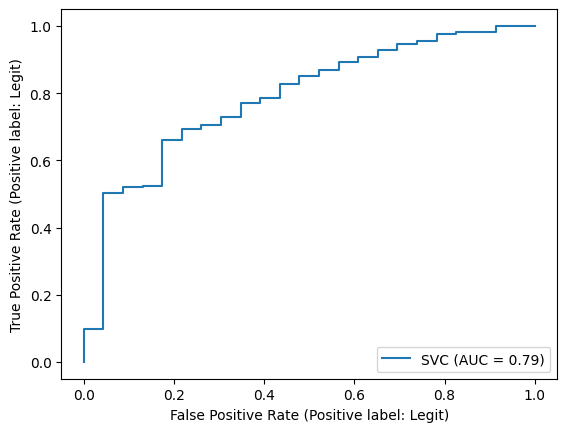

In [206]:
# ?

# Task 26: Create a Precision-Recall curve

In [269]:
# MY CODE HERE
from sklearn.metrics import PrecisionRecallDisplay

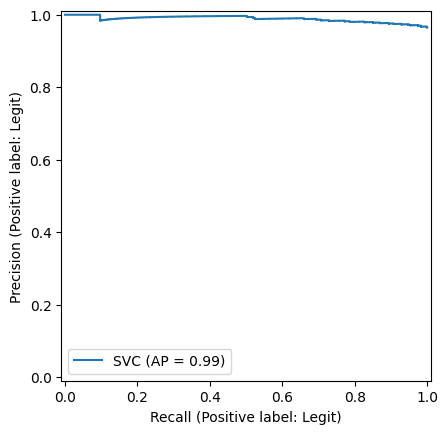

In [288]:
PrecisionRecallDisplay.from_estimator(best_model, X_test_scaled, y_test);

In [207]:
# ? (imports)

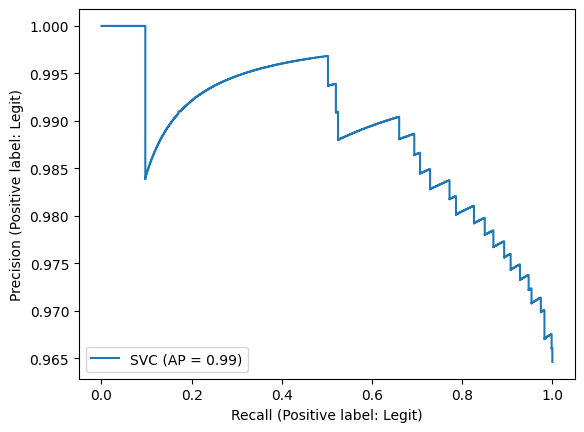

In [208]:
# ?

# Task 27: Model performance

Think about how well this model performs:
- Would you suggest using it? 
- Realistically will this work?

In [ ]:
# discussion in the "solutions" notebook.

In [289]:
int(cm[0,1])

11

# Outstanding!